In [2]:
import pandas as pd
fraud = pd.read_csv("./creditcard_2023.csv")
fraud.head()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,...,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0
1,1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,...,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0
2,2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,...,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0
3,3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,...,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0
4,4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,...,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0


In [3]:
fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568630 entries, 0 to 568629
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      568630 non-null  int64  
 1   V1      568630 non-null  float64
 2   V2      568630 non-null  float64
 3   V3      568630 non-null  float64
 4   V4      568630 non-null  float64
 5   V5      568630 non-null  float64
 6   V6      568630 non-null  float64
 7   V7      568630 non-null  float64
 8   V8      568630 non-null  float64
 9   V9      568630 non-null  float64
 10  V10     568630 non-null  float64
 11  V11     568630 non-null  float64
 12  V12     568630 non-null  float64
 13  V13     568630 non-null  float64
 14  V14     568630 non-null  float64
 15  V15     568630 non-null  float64
 16  V16     568630 non-null  float64
 17  V17     568630 non-null  float64
 18  V18     568630 non-null  float64
 19  V19     568630 non-null  float64
 20  V20     568630 non-null  float64
 21  V21     56

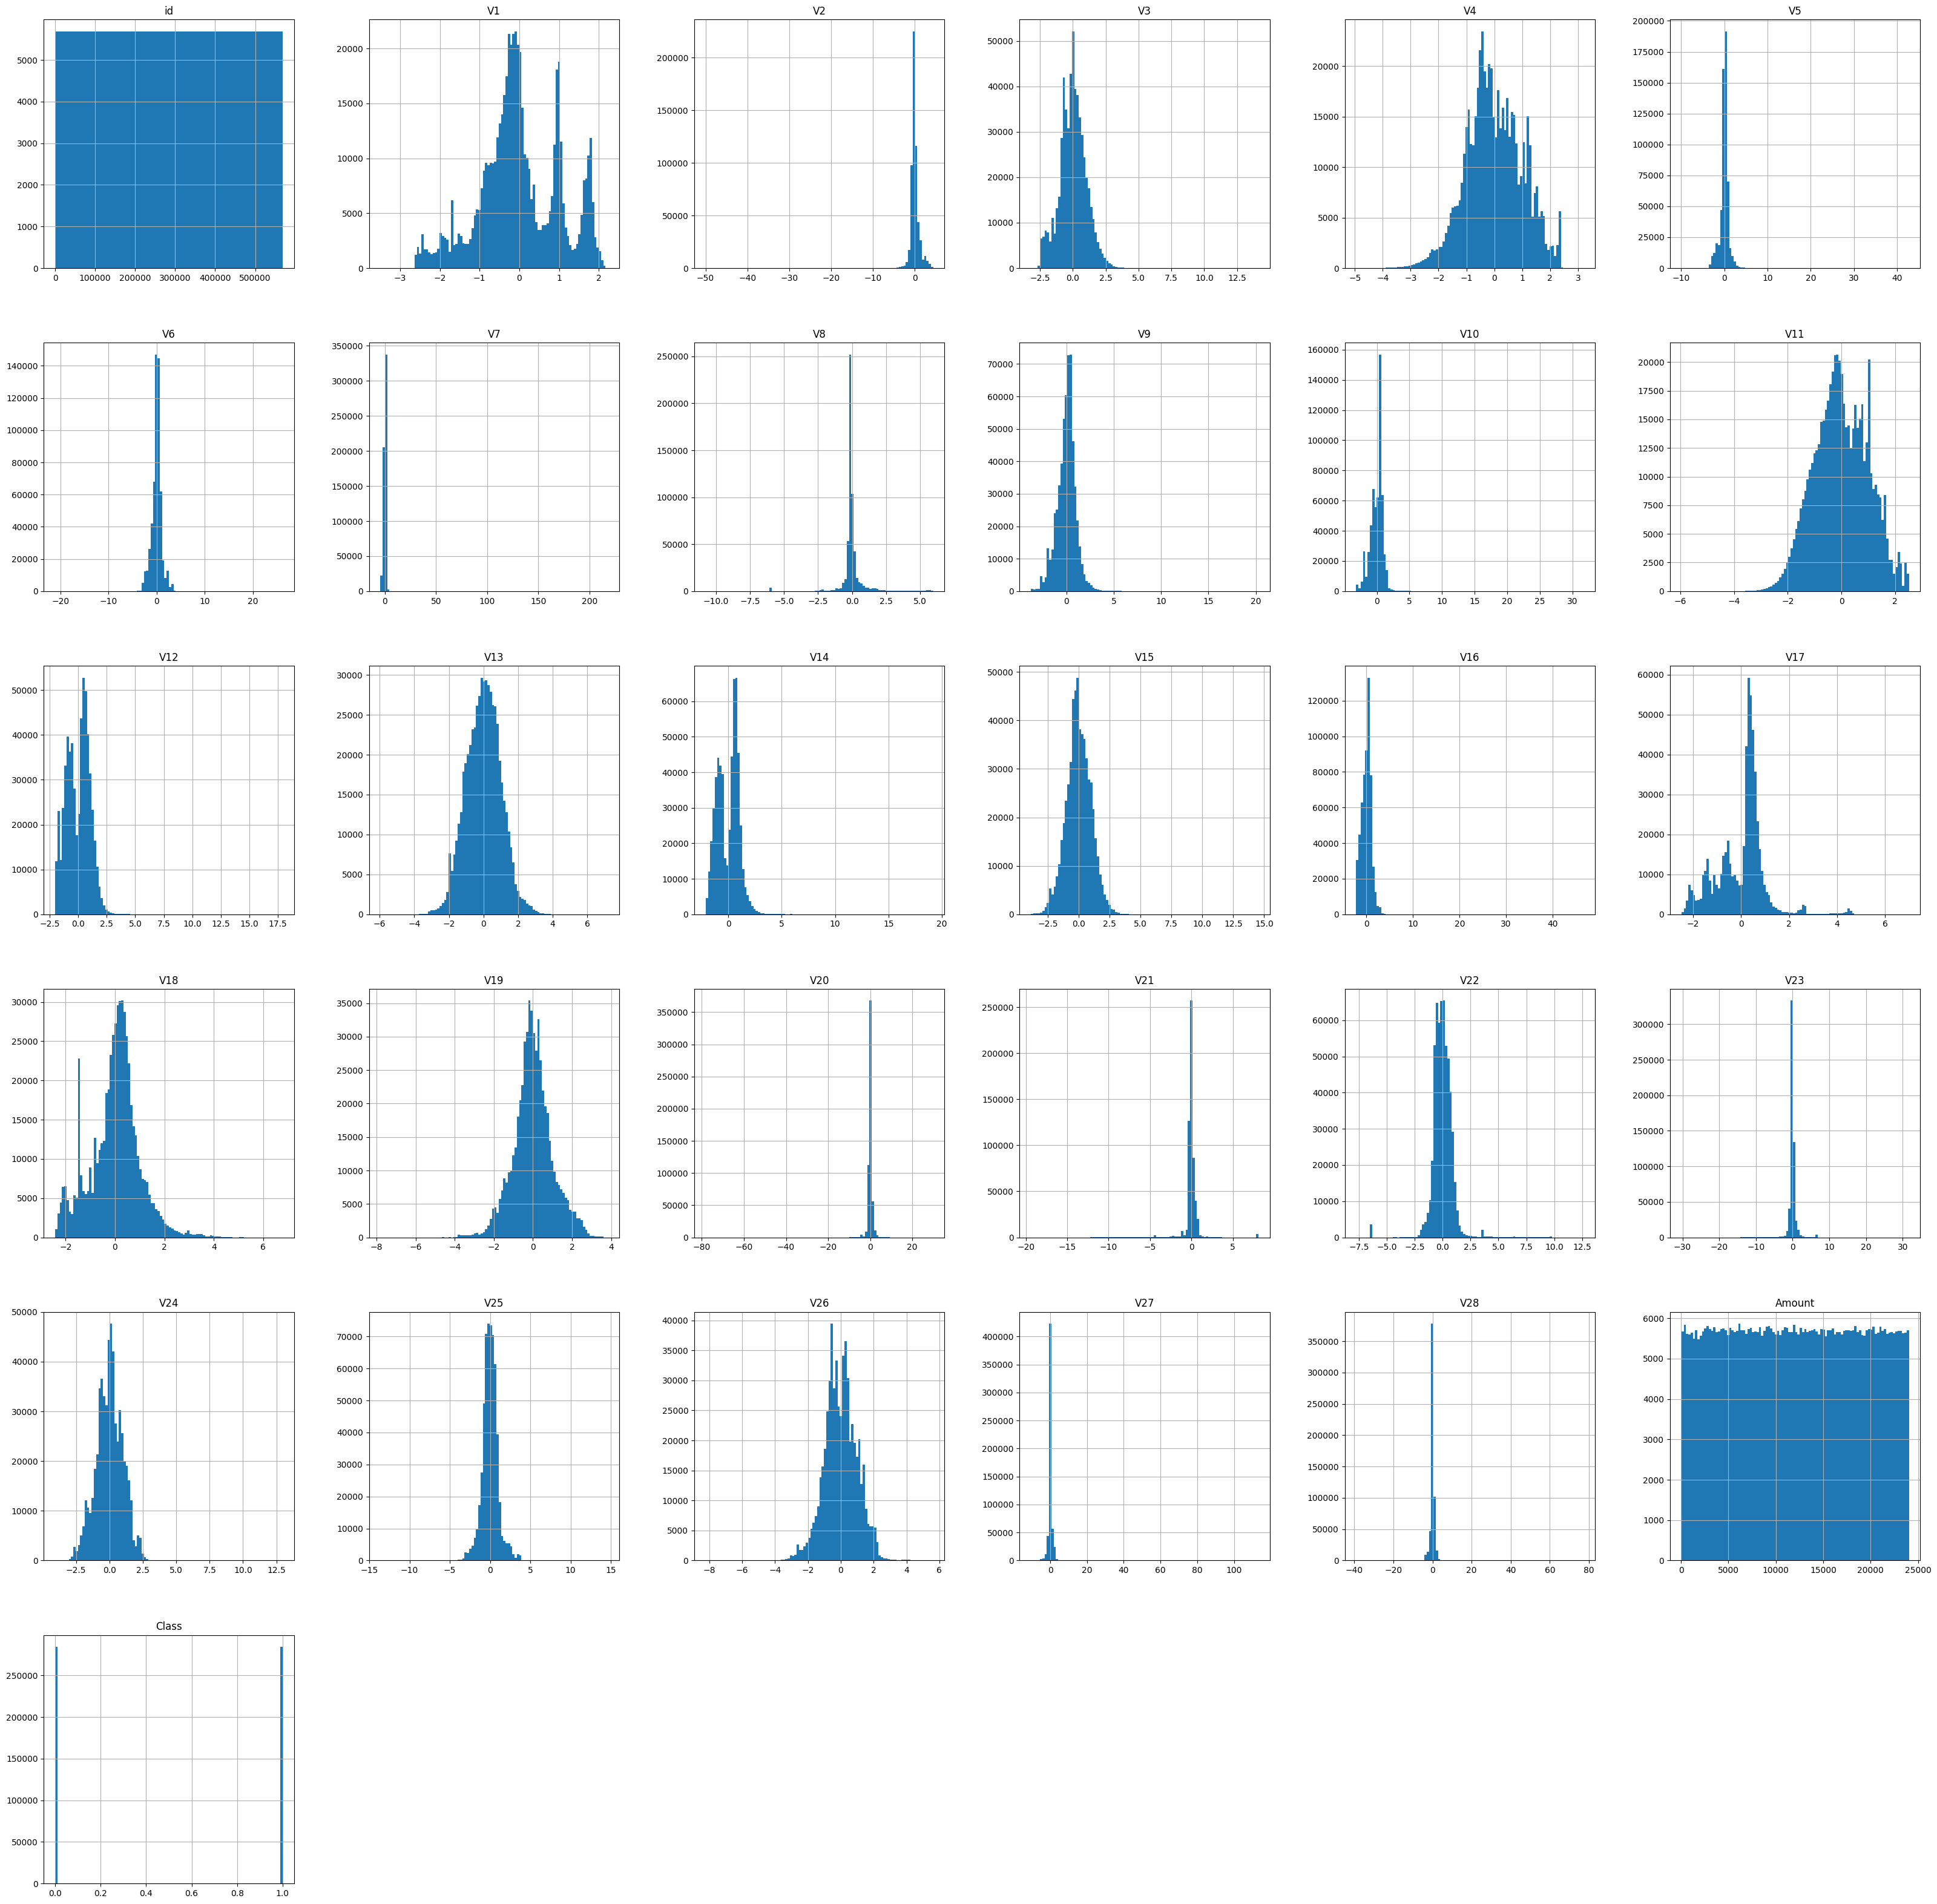

In [4]:
# data distribution 
%matplotlib inline
import matplotlib.pyplot as plt 
fraud.hist(bins = 100, figsize=(40,40))
plt.show()

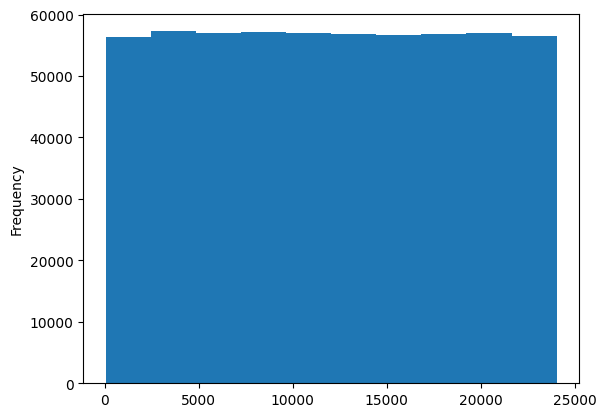

In [5]:
fraud["Amount"].plot.hist(bins = 10)
plt.show()

In [6]:
# avoid snooping by setting the test set to the side after looking at data distribution 
from sklearn.model_selection import train_test_split
# we dont need the id col 
fraud = fraud.drop("id", axis = 1)
train_set, test_set = train_test_split(fraud, random_state= 69)
# create a copy of train_set to not mess it up 
fraud = train_set.copy()

In [7]:
# take a look at some correlations to see which cols corr with the class 
correlations = fraud.corr()
correlations["Class"].sort_values(ascending = False)

Class     1.000000
V4        0.735763
V11       0.724015
V2        0.491518
V19       0.243990
V27       0.213625
V20       0.179852
V8        0.145220
V21       0.110022
V28       0.101446
V26       0.071750
V25       0.062874
V22       0.013488
V23       0.010256
Amount    0.002640
V15      -0.039778
V13      -0.070189
V24      -0.130447
V5       -0.338075
V18      -0.409846
V6       -0.435259
V17      -0.476687
V7       -0.485880
V1       -0.505911
V16      -0.573034
V9       -0.585403
V10      -0.673173
V3       -0.682225
V12      -0.768402
V14      -0.805768
Name: Class, dtype: float64

In [8]:
# separate feature and label data 
fraud = train_set.drop("Class", axis = 1)
fraud_labels = train_set['Class'].copy()
print(fraud.shape, fraud_labels.shape)

(426472, 29) (426472,)


In [9]:
from sklearn.preprocessing import MinMaxScaler
mm_scaler = MinMaxScaler()
fraud_prepared = pd.DataFrame(mm_scaler.fit_transform(fraud), columns=fraud.columns)

array([[<AxesSubplot: title={'center': 'V1'}>,
        <AxesSubplot: title={'center': 'V2'}>,
        <AxesSubplot: title={'center': 'V3'}>,
        <AxesSubplot: title={'center': 'V4'}>,
        <AxesSubplot: title={'center': 'V5'}>],
       [<AxesSubplot: title={'center': 'V6'}>,
        <AxesSubplot: title={'center': 'V7'}>,
        <AxesSubplot: title={'center': 'V8'}>,
        <AxesSubplot: title={'center': 'V9'}>,
        <AxesSubplot: title={'center': 'V10'}>],
       [<AxesSubplot: title={'center': 'V11'}>,
        <AxesSubplot: title={'center': 'V12'}>,
        <AxesSubplot: title={'center': 'V13'}>,
        <AxesSubplot: title={'center': 'V14'}>,
        <AxesSubplot: title={'center': 'V15'}>],
       [<AxesSubplot: title={'center': 'V16'}>,
        <AxesSubplot: title={'center': 'V17'}>,
        <AxesSubplot: title={'center': 'V18'}>,
        <AxesSubplot: title={'center': 'V19'}>,
        <AxesSubplot: title={'center': 'V20'}>],
       [<AxesSubplot: title={'center': 'V21'}

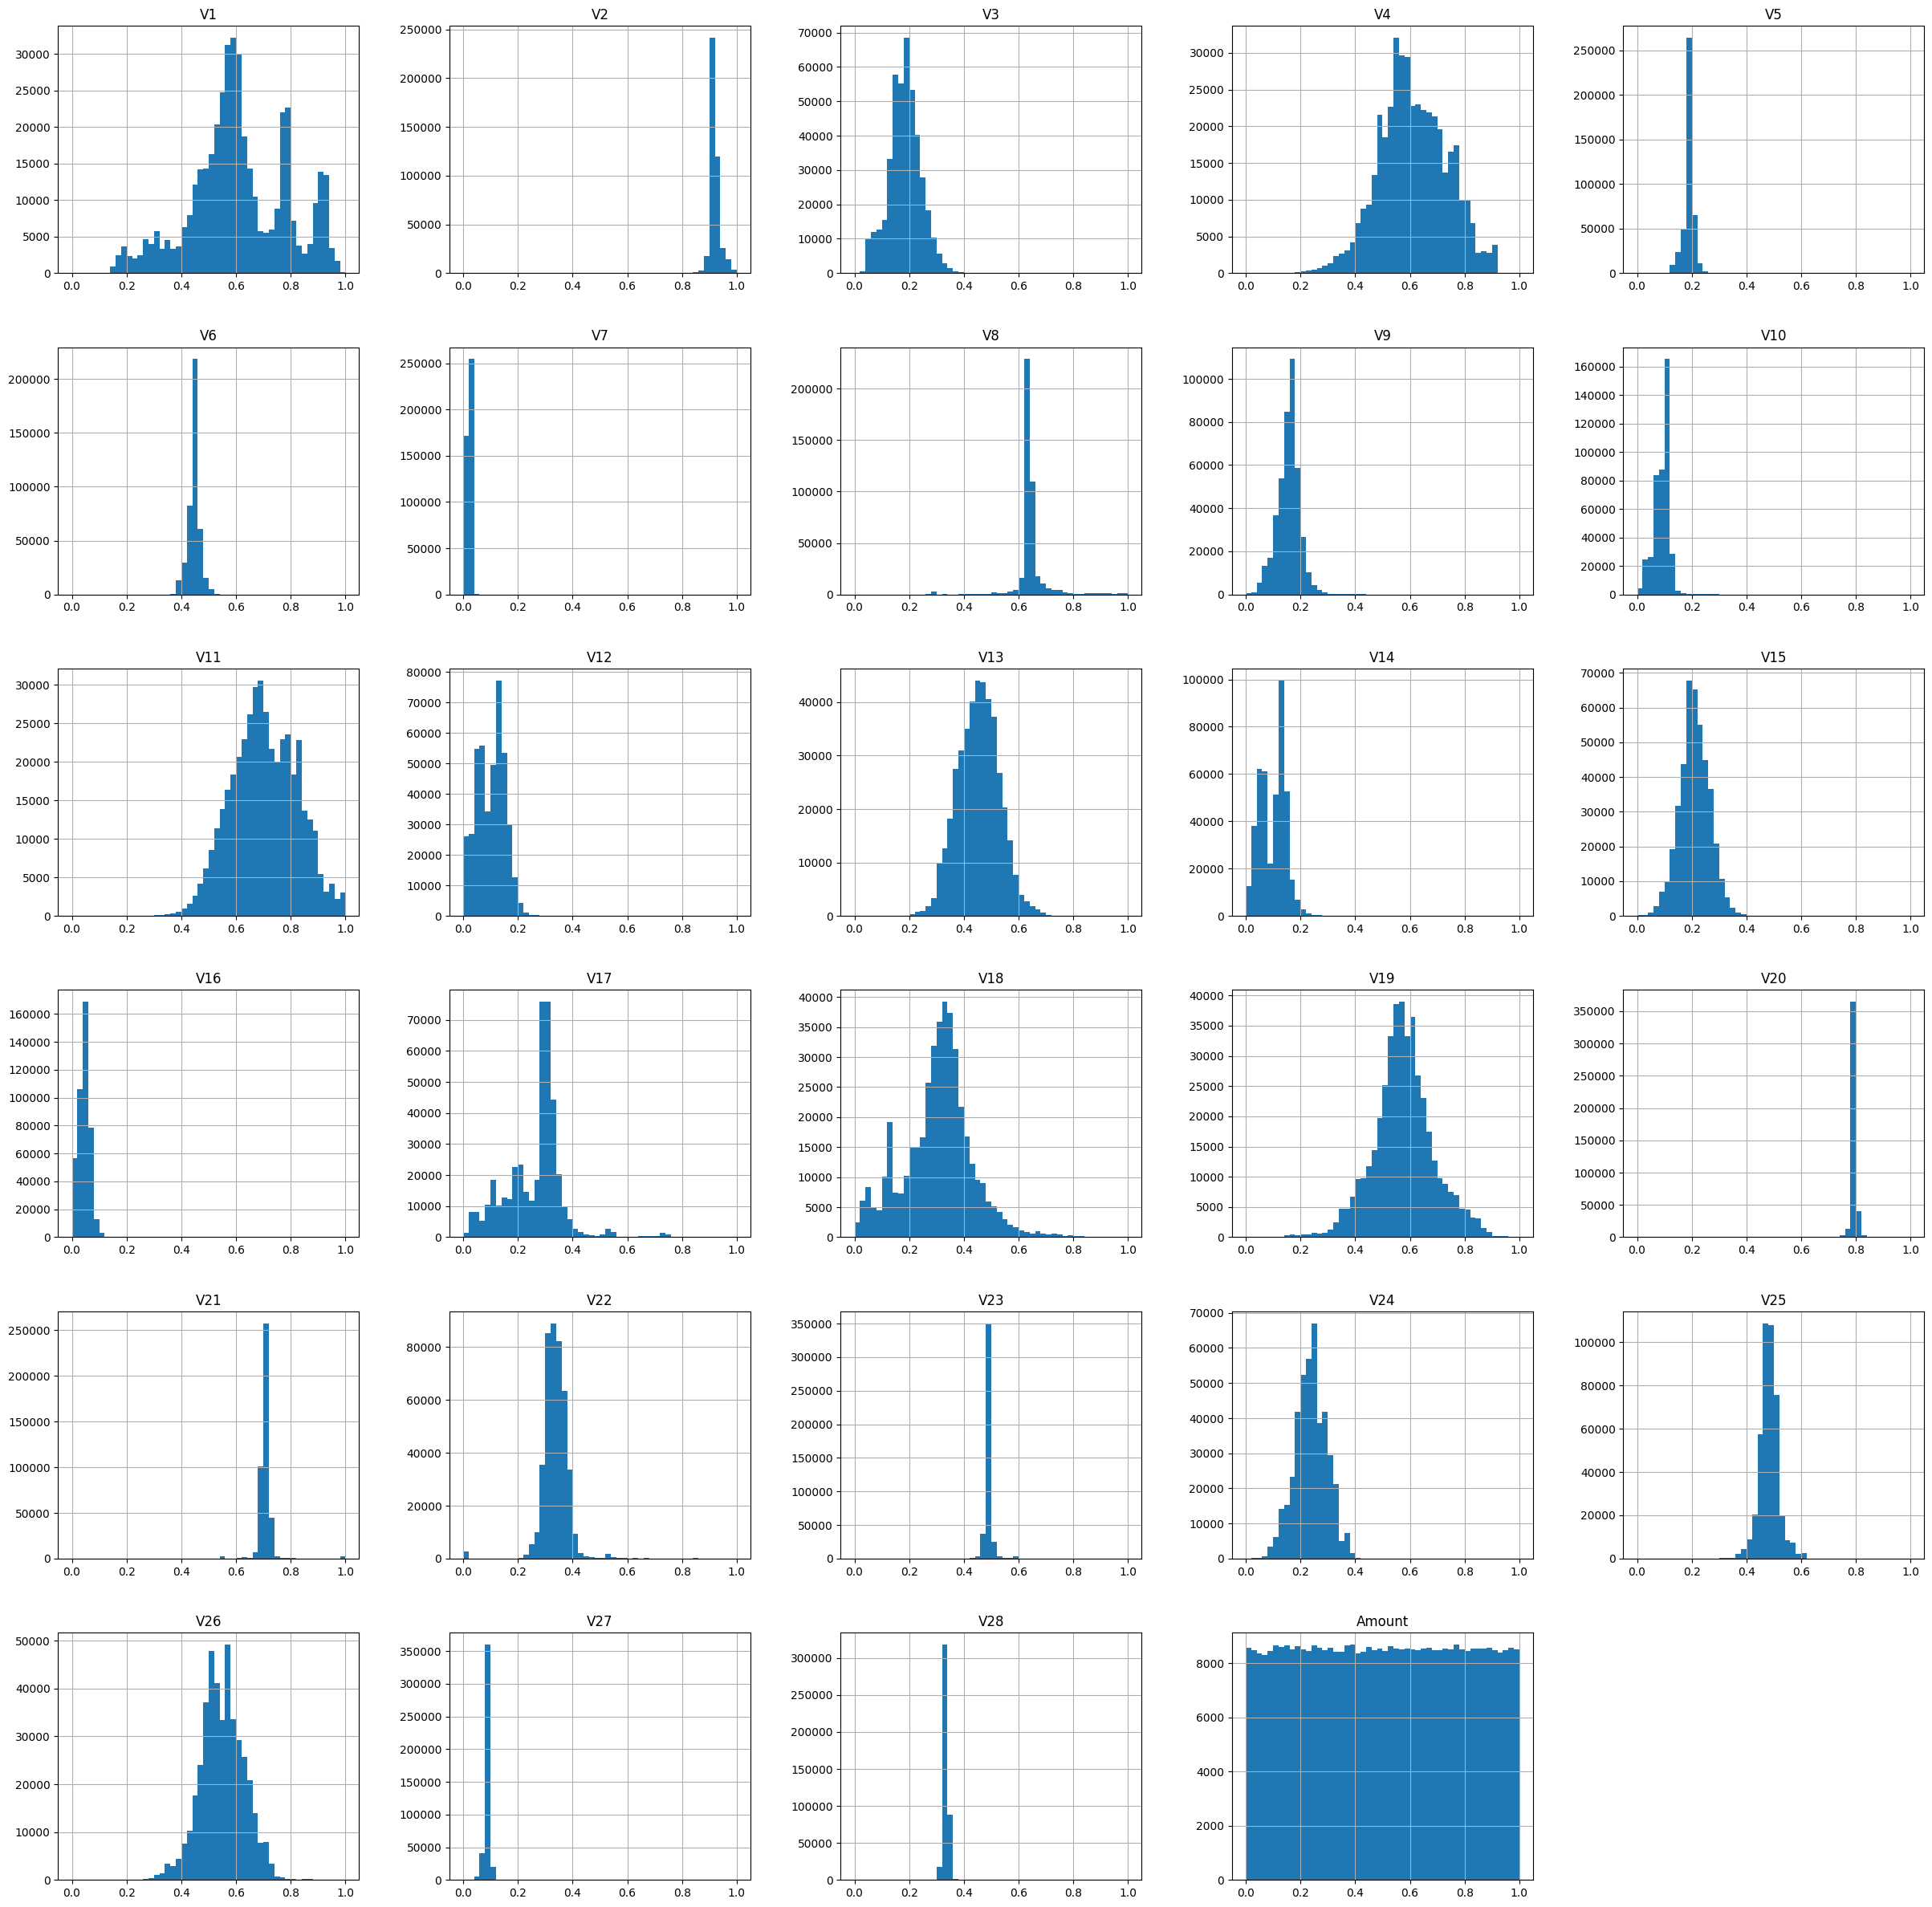

In [10]:
fraud_prepared.hist(bins= 50, figsize=(30,30) )

In [11]:
# begin with logistic regression
import warnings 
warnings.filterwarnings("ignore")
from sklearn.linear_model import LogisticRegressionCV, LogisticRegression
log_reg = LogisticRegressionCV(Cs=[0.01, 0.1, 1.0, 5, 10], cv=5, max_iter=15)
log_reg.fit(fraud_prepared, fraud_labels)

best_C = log_reg.C_[0]
best_log_reg = LogisticRegression(C=best_C)

# make predictions 
best_log_reg.fit(fraud_prepared, fraud_labels)
log_reg_predictions = best_log_reg.predict(fraud_prepared)

In [12]:
# evaluation
from sklearn.metrics import classification_report
print(classification_report(log_reg_predictions, fraud_labels))

              precision    recall  f1-score   support

           0       0.98      0.95      0.96    219473
           1       0.95      0.98      0.96    206999

    accuracy                           0.96    426472
   macro avg       0.96      0.96      0.96    426472
weighted avg       0.96      0.96      0.96    426472



In [14]:
# decsion tree 
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth=5)
dt.fit(fraud_prepared, fraud_labels)

dt_predictions = dt.predict(fraud_prepared)
print(classification_report(fraud_labels, dt_predictions))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96    212912
           1       0.97      0.95      0.96    213560

    accuracy                           0.96    426472
   macro avg       0.96      0.96      0.96    426472
weighted avg       0.96      0.96      0.96    426472



In [15]:
# lets try a random forest 
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, cross_val_predict
# Create a Random Forest Classifier (you can set hyperparameters here)
rf = RandomForestClassifier(n_estimators=100, random_state=42, max_depth = 8, criterion="gini")

rf.fit(fraud_prepared, fraud_labels)

# cross-validation
rf_predictions = rf.predict(fraud_prepared)
print(classification_report(fraud_labels, rf_predictions))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97    212912
           1       1.00      0.95      0.97    213560

    accuracy                           0.97    426472
   macro avg       0.97      0.97      0.97    426472
weighted avg       0.97      0.97      0.97    426472



In [16]:
# next well go with a support vector machine 
# support vector machine runs in quadratic time 
# from sklearn.svm import SVC

# # Define the parameter grid
# param_dist = {
#     'C': [0.1, 1, 10],
#     'kernel': ['linear', 'rbf'],
# }

# grid_search = RandomizedSearchCV(SVC(), param_distributions=param_dist, scoring="f1")
# grid_search.fit(fraud_prepared, fraud_labels)

# best_lsvc = grid_search.best_estimator_

In [17]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV
knn = KNeighborsClassifier()
param_dist ={
    'n_neighbors': list(range(1, 10, 1)),
}

random_grid = RandomizedSearchCV(knn, param_distributions= param_dist)
random_grid.fit(fraud_prepared, fraud_labels)

best_params = random_grid.best_params_
print(best_params)

{'n_neighbors': 2}


In [18]:
knn = KNeighborsClassifier(**best_params)
knn.fit(fraud_prepared, fraud_labels)
knn_predictions = knn.predict(fraud_prepared)
print(classification_report(fraud_labels, knn_predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    212912
           1       1.00      1.00      1.00    213560

    accuracy                           1.00    426472
   macro avg       1.00      1.00      1.00    426472
weighted avg       1.00      1.00      1.00    426472



In [23]:
# lets use the log_reg best model from cross validation to try on the test set 

# prepare the test set 
final_fraud = test_set.drop("Class", axis = 1)
final_labels = test_set["Class"].copy()
print(final_fraud.shape, final_labels.shape)


# scaling 
final_fraud_prepared = pd.DataFrame(mm_scaler.fit_transform(final_fraud), columns=final_fraud.columns)

(142158, 29) (142158,)


In [24]:
# run predictions 

final_predictions = best_log_reg.predict(final_fraud_prepared)

In [25]:
print(classification_report(final_predictions, final_labels))

              precision    recall  f1-score   support

           0       1.00      0.63      0.78    112561
           1       0.42      1.00      0.59     29597

    accuracy                           0.71    142158
   macro avg       0.71      0.82      0.68    142158
weighted avg       0.88      0.71      0.74    142158

